# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | nadym
Processing Record 3 of Set 1 | bamboo flat
Processing Record 4 of Set 1 | pervomayskiy
Processing Record 5 of Set 1 | kundiawa
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | la ronge
Processing Record 8 of Set 1 | san andres
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | mandalgovi
Processing Record 12 of Set 1 | nar'yan-mar
Processing Record 13 of Set 1 | tual
Processing Record 14 of Set 1 | port macquarie
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | mejit
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | mathis
Processing Record 20 of Set 1 | kassala
Processing Record 21 of Set 1 | mahdia
Processing Record 22 of Set 1 | aykhal
Processing Record 23 o

In [12]:
###TEST###
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
shity_url = f'{url}q={city}&appid={weather_api_key}'
response = requests.get(shity_url)
print("Status code: ", response.status_code)
print("Response text: ", response.text)

Status code:  401
Response text:  {"cod":401, "message": "Invalid API key. Please see https://openweathermap.org/faq#error401 for more info."}


In [4]:
###TEST###
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "london"
shity_url = f'{url}q={city}&appid={weather_api_key}'
shity_weather = requests.get(shity_url).json()
shity_weather


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 283.37,
  'feels_like': 282.9,
  'temp_min': 282.42,
  'temp_max': 284.13,
  'pressure': 983,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 6.17, 'deg': 210},
 'rain': {'1h': 0.97},
 'clouds': {'all': 75},
 'dt': 1707421888,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1707377314,
  'sunset': 1707411649},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [ ]:
###TEST###
city_lat = shity_weather['coord']['lat']
city_lng = shity_weather['coord']['lon']
city_max_temp = shity_weather['main']['temp_max']
print(city_lat,city_lng,city_max_temp)

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
# Display sample data
city_data_df.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,253.00,65,75,1.03,CA,1707422317
1,nadym,65.5333,72.5167,267.03,93,100,7.26,RU,1707422317
2,bamboo flat,11.7000,92.7167,298.20,88,20,1.03,IN,1707422318
3,pervomayskiy,53.2485,40.2871,257.36,96,9,3.96,RU,1707422318
4,kundiawa,-6.0167,144.9667,290.10,96,100,0.80,PG,1707422318
5,puerto natales,-51.7236,-72.4875,289.40,44,75,14.40,CL,1707422319
6,la ronge,55.1001,-105.2842,265.27,79,75,2.57,CA,1707421773
7,san andres,12.5847,-81.7006,301.16,54,40,6.17,CO,1707422319
8,new norfolk,-42.7826,147.0587,287.87,88,42,1.63,AU,1707421836
9,adamstown,-25.0660,-130.1015,297.11,92,100,12.65,PN,1707422319


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,253.00,65,75,1.03,CA,1707422317
1,nadym,65.5333,72.5167,267.03,93,100,7.26,RU,1707422317
2,bamboo flat,11.7000,92.7167,298.20,88,20,1.03,IN,1707422318
3,pervomayskiy,53.2485,40.2871,257.36,96,9,3.96,RU,1707422318
4,kundiawa,-6.0167,144.9667,290.10,96,100,0.80,PG,1707422318


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

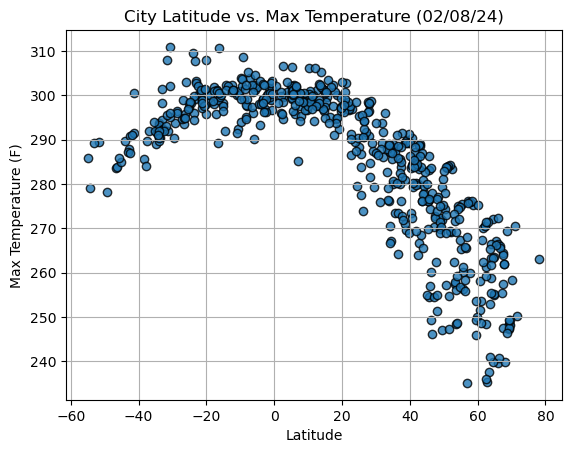

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],[city_data_df["Max Temp"]],edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

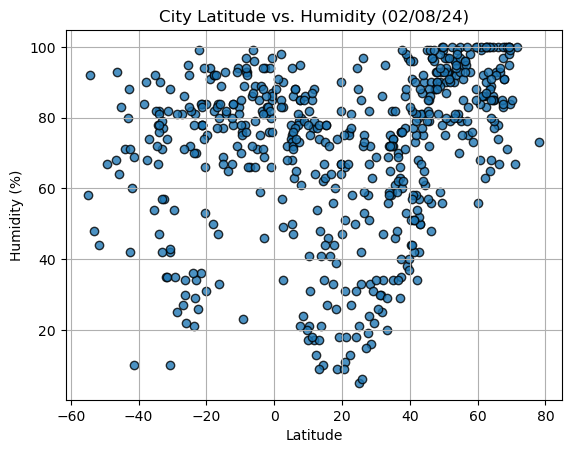

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

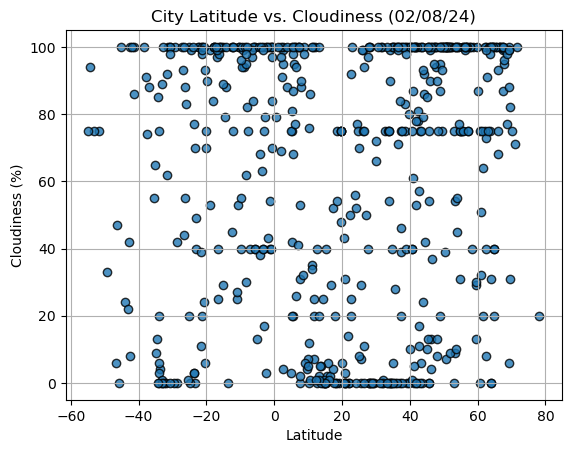

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

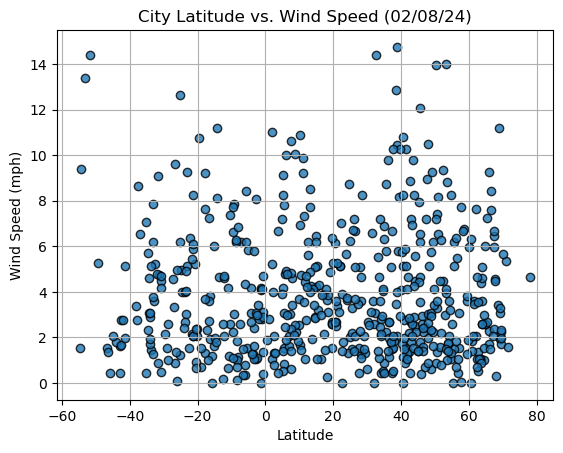

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE